<a href="https://colab.research.google.com/github/ClaudiaGtzD/BDR/blob/master/Tarea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Autónoma de Nuevo León

### MCD - Base de Datos Relacionales - Tarea 10

### 1421582 - Claudia Lissette Gutiérrez Díaz

Realizamos la instalación del conector:

In [ ]:
pip install mysql-connector-python

Realizamos la importación de las librerías.

In [48]:
import mysql.connector as mysql
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt

Para que ésta conexión funcione, se debe realizar la conexión del entorno usando una variable local. En mi caso, usé la conexión mediante Jupyter Notebook, así que todo esto se ejecutó en mi computadora local. Una vez establecida la conexión, hacemos la prueba de conexión exitosa, imprimiendo todas las bases de datos.

In [88]:
conn = mysql.connect(
    host = '127.0.0.1',
    user = 'root',
    database = 'servicio_clientes',
    password = '*******',
    port = 3306
)
cursor = conn.cursor()
cursor.execute("SHOW DATABASES")
df = cursor.fetchall()

for data in df:
  print(data)

('ejemplo',)
('information_schema',)
('lahmansbaseballdb',)
('movies',)
('mysql',)
('performance_schema',)
('prueba',)
('sakila',)
('servicio_clientes',)
('sys',)
('usuarios_carros',)
('vistas',)
('world',)


Vamos a leer la información de quejas, usando la vista que hice en tareas pasadas, que es la tabla principal. Aquí al ejecutar el query, no me estaba regresando el nombre de las columnas, por lo que mejor usé read_sql.

In [ ]:
 query = "SELECT * FROM datosqueja"
 quejas = pd.read_sql(query, con = conn)

Imprimimos:

In [66]:
quejas

,id,fecha_recepcion,fecha_envio,producto,subproducto,asunto,subasunto,descripcion_queja,descripcion_solucion,compania,estado,codigo_postal,etiquetas,estatus_autorizacion,medio_comunicacion,estatus_queja,se_abre_disputa,tiempo_respuesta
0,60,2013-07-29,2013-09-17,Debt collection,Credit card,Communication tactics,Threatened to take legal action,,,"Borenstein & Associates, LLC",Wyoming,82605,,N/A,Web,Closed,No,50
1,62,2013-07-29,2013-08-13,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,,,Ocwen,New York,10038,,N/A,Web,Closed,No,15
2,138,2013-07-31,2013-08-05,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",None,,,Specialized Loan Servicing LLC,California,94565,,N/A,Web,Closed,No,5
3,245,2013-07-22,2013-07-25,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",None,,,American Southwest Mortgage Corporation,Texas,76116,Servicemember,N/A,Web,Closed,Sí,3
4,343,2013-08-06,2013-08-09,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",None,,,Specialized Loan Servicing LLC,Washington,98225,,N/A,Web,Closed,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10616,9797,2013-12-03,2014-01-09,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",None,,,Prudent Law Group,Florida,34610,,N/A,Web,Untimely response,No,37
10617,9964,2013-11-07,2013-12-04,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,,,"Mobiloans, LLC",Pennsylvania,19610,,N/A,Web,Untimely response,No,27
10618,5823,2013-09-27,2013-09-30,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,,,Encore Capital Group,California,95010,,N/A,Referral,Untimely response,No,3
10619,8878,2013-11-13,2013-12-04,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,,,"Mobiloans, LLC",Tennessee,37209,,N/A,Referral,Untimely response,No,21


Como consultas podemos obtener qué productos se reportan más mediante llamada telefónica.

In [ ]:
query = "SELECT producto, count(producto) AS cantidad FROM datosqueja d WHERE medio_comunicacion  = 'Phone' GROUP BY producto ORDER BY cantidad DESC"
productos = pd.read_sql(query, con = conn)

In [68]:
productos

,producto,cantidad
0,Debt collection,318
1,Mortgage,308
2,Bank account or service,226
3,Credit card,127
4,Consumer Loan,37
5,Money transfers,22
6,Student loan,13
7,Credit reporting,3
8,Payday loan,3


Ahora, vamos a realizar el ABC, para probar la interacción entre las llamadas desde phyton a la base de datos.

In [69]:
#Reemplazamos el código del estatus_queja de "Ultimetly response" a "In Progress", al reemplazarlo, ya no quedan registros en quejas
query = """UPDATE quejas q
    INNER JOIN estatus_quejas eq
      ON eq.id = q.id_estatus_queja
    SET id_estatus_queja = (SELECT id FROM estatus_quejas eq2 WHERE eq2.descripcion = 'In progress')
    WHERE eq.descripcion = 'Untimely response'"""
cursor.execute(query)

In [ ]:
query = "SELECT * FROM datosqueja d WHERE estatus_queja = 'Untimely response'"
quejas = pd.read_sql(query, con = conn)

In [71]:
quejas

,id,fecha_recepcion,fecha_envio,producto,subproducto,asunto,subasunto,descripcion_queja,descripcion_solucion,compania,estado,codigo_postal,etiquetas,estatus_autorizacion,medio_comunicacion,estatus_queja,se_abre_disputa,tiempo_respuesta


Ahora eliminaremos el estatus queja de Untimely response, ya que ningún registro lo tiene.

In [72]:
query = "DELETE FROM estatus_quejas WHERE descripcion = 'Untimely response';"
cursor.execute(query)

In [ ]:
query = "SELECT * FROM estatus_quejas d"
eq = pd.read_sql(query, con = conn)

In [76]:
eq

,id,descripcion
0,2,Closed
1,1,Closed with explanation
2,4,Closed with monetary relief
3,3,Closed with non-monetary relief
4,7,Closed with relief
5,6,Closed without relief
6,8,In progress


Ahora, vamos a insertar un nuevo tipo de medio de comunicación.

In [77]:
query = """INSERT INTO medios_comunicacion (nombre)
  VALUES ('Personal');"""
cursor.execute(query)

In [ ]:
query = "SELECT * FROM medios_comunicacion order by id"
mc = pd.read_sql(query, con = conn)

In [81]:
mc

,id,nombre
0,1,Phone
1,2,Web
2,3,Fax
3,4,Referral
4,5,Postal mail
5,6,Email
6,7,Personal


Por último, vamos a trabajar con la vista de quejas, para mostrar en una gráfica la proporción de los productos y sus quejas.

In [ ]:
query = "SELECT * FROM datosqueja"
quejas = pd.read_sql(query, con = conn)

In [99]:
productos_count = quejas.producto.value_counts()
productos_count

producto
Mortgage                   3837
Debt collection            2047
Credit reporting           1535
Bank account or service    1285
Credit card                1225
Consumer Loan               309
Student loan                279
Money transfers              78
Payday loan                  26
Name: count, dtype: int64

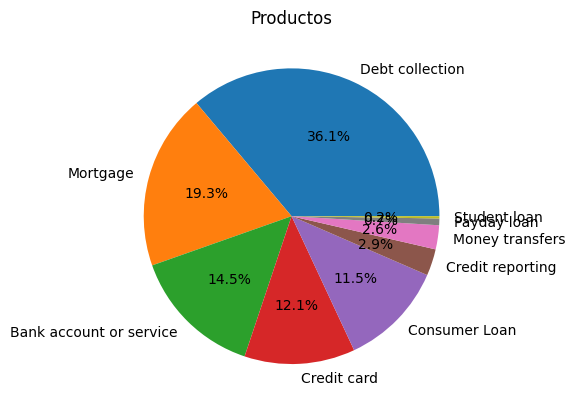

In [100]:
plt.pie(
    productos_count,
    labels = quejas.producto.unique(),
    autopct= '%1.1f%%'
)
plt.title('Productos')
plt.show()